# Machine Learning com Regressão Linear
    Fórmula da regrassão Y = (a.x + b) onde a e b são váriaveis a descobrir

In [39]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
conexao = sql.connect("Banco de Dados")
cursor = conexao.cursor()

In [13]:
cursor.execute('CREATE TABLE PR_Test(Apartamento text, Metragem real, Preco real)')

conexao.commit()

OperationalError: table PR_Test already exists

In [14]:
cursor.execute(' INSERT INTO PR_Test VALUES("Apto01", 45, 210.950)')
cursor.execute(' INSERT INTO PR_Test VALUES("Apto02", 50, 250.250)')
cursor.execute(' INSERT INTO PR_Test VALUES("Apto03", 55, 380.670)')
cursor.execute(' INSERT INTO PR_Test VALUES("Apto04", 60, 410.200)')
cursor.execute(' INSERT INTO PR_Test VALUES("Apto05", 65, 450.900)')

In [15]:
consulta = cursor.execute(
    '''
        SELECT * FROM PR_Test
    '''
).fetchall()

for linha in consulta:
    print(linha)

('Apto01', 45.0, 210.95)
('Apto02', 50.0, 250.25)
('Apto03', 55.0, 380.67)
('Apto04', 60.0, 410.2)
('Apto05', 65.0, 450.9)


In [26]:
dados = pd.DataFrame(consulta) 

In [27]:
dados

,0,1,2
0,Apto01,45.0,210.95
1,Apto02,50.0,250.25
2,Apto03,55.0,380.67
3,Apto04,60.0,410.20
4,Apto05,65.0,450.90


In [28]:
dados. rename(columns = {0:'Apartamento', 1:'Metragem', 2:'Preco'}, inplace = True)

# Achando Valor de a
            (M x SUM(Metragem*Preco) - SUM(Metragem) * SUM(Preco) )
      a =  ------------------------------------------------------
                   M * SUM(Metragem²) - (SUM(Metragem))²

In [30]:
M = len(dados.index)
Soma_Metragem = dados['Metragem'].sum()
SomaPreco = dados['Preco'].sum()

dados['Result'] = dados['Metragem'] * dados['Preco']
result = dados['Result'].sum()



In [31]:
 Soma_Met_quad = 0
 
for linha in dados.Metragem:
    x = (linha*linha)
    Soma_Met_quad = Soma_Met_quad + x
    

 a =((M*result) - (Soma_Metragem * SomaPreco )) /(M*Soma_Met_quad - (Soma_Metragem * Soma_Metragem))
 a



12.797000000000047

# Achando Valor de b
        b = AVG(Preco) - a*AVG(Metragem)
   

In [32]:
SomaPreco = dados['Preco'].sum()
Soma_Metragem = dados['Metragem'].sum()

media_Metragem = Soma_Metragem/M
media_Preco = SomaPreco/M
media_Metragem 

55.0

In [33]:
b = media_Preco - a*media_Metragem
b

-363.2410000000026

# Agora vamos calcular a Formula geral da Regressão Linear
          Y = (a.x + b)

In [34]:
dados

,Apartamento,Metragem,Preco,Result
0,Apto01,45.0,210.95,9492.75
1,Apto02,50.0,250.25,12512.50
2,Apto03,55.0,380.67,20936.85
3,Apto04,60.0,410.20,24612.00
4,Apto05,65.0,450.90,29308.50


In [35]:
Y = (a*42 + b)
Y

174.23299999999938

In [36]:
eixo_x = dados.iloc[:,1].values
eixo_y = dados.iloc[:,2].values

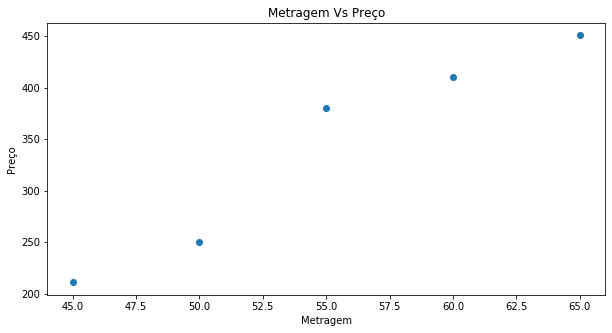

In [40]:
plt.figure(figsize=(10,5))
plt.scatter(eixo_x, eixo_y);
plt.title('Metragem Vs Preço')
plt.xlabel("Metragem")
plt.ylabel('Preço');

In [41]:
correl = np.corrcoef(eixo_x, eixo_y)
correl

array([[1.        , 0.96915716],
       [0.96915716, 1.        ]])

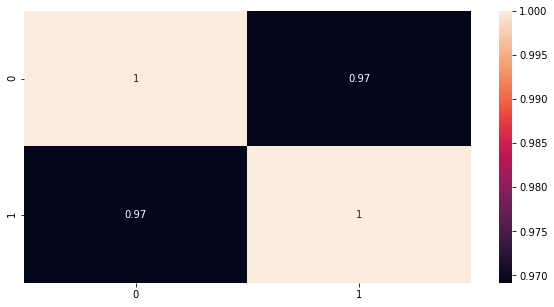

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(correl, annot= True);